<a href="https://colab.research.google.com/github/YuYuanyuan0817/BDBMA/blob/master/BDBMA_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cohort analysis

In [4]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
from datetime import date, time, datetime
from operator import attrgetter

In [5]:
df1 = pd.read_csv('customers_sample.csv',sep=";", engine='python')
print(df1)

            uid1  customer_age country city_of_living registration_dt  \
0         8388.0          46.0  RUSSIA          Kazan      18.02.2017   
1        17264.0          20.0  RUSSIA     Sevastopol      21.07.2020   
2        17373.0          31.0  RUSSIA          Kazan      26.02.2016   
3        26297.0          27.0  RUSSIA     Sevastopol      25.01.2018   
4        27044.0          41.0  RUSSIA     Sevastopol      17.07.2015   
...          ...           ...     ...            ...             ...   
1048570      NaN           NaN     NaN            NaN             NaN   
1048571      NaN           NaN     NaN            NaN             NaN   
1048572      NaN           NaN     NaN            NaN             NaN   
1048573      NaN           NaN     NaN            NaN             NaN   
1048574      NaN           NaN     NaN            NaN             NaN   

        website_last_visit_date  email  has_mob_app  phone_number  push  
0                    01.05.2019    0.0          0

In [6]:
df1.dropna()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9994,52794143.0,35.0,RUSSIA,Volgograd,26.02.2012,27.04.2021,0.0,1.0,1.0,1.0
9995,52794735.0,42.0,RUSSIA,Omsk,04.06.2013,22.01.2021,1.0,1.0,1.0,1.0
9996,52801709.0,57.0,RUSSIA,Omsk,17.08.2013,18.02.2016,0.0,0.0,1.0,0.0
9997,52808813.0,40.0,RUSSIA,Sevastopol,14.12.2020,23.12.2020,0.0,0.0,1.0,0.0


In [7]:
df2 = pd.read_csv('transactional_data.csv',sep=",", engine='python')
print(df2)

             uid1    date_pur  mcc_id  transaction_amt  transaction_qty
0        14164181  2020-09-10    5499           418.00                1
1        15453249  2020-08-10    5541          1034.00                1
2        41571339  2020-09-12    5411            57.98                1
3         2044223  2021-06-28    5921           549.40                4
4        33493259  2020-07-20    4121           578.00                2
...           ...         ...     ...              ...              ...
4710496  26929325  2021-10-08    4784           393.00                2
4710497  22929281  2021-09-26    5499           125.00                1
4710498   6635934  2020-09-21    5541           522.50                1
4710499  45966540  2021-09-04    5921             0.00                0
4710500  29302926  2021-04-29    5311           -55.00               -1

[4710501 rows x 5 columns]


In [8]:
df2.dropna()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,2020-09-10,5499,418.00,1
1,15453249,2020-08-10,5541,1034.00,1
2,41571339,2020-09-12,5411,57.98,1
3,2044223,2021-06-28,5921,549.40,4
4,33493259,2020-07-20,4121,578.00,2
...,...,...,...,...,...
4710496,26929325,2021-10-08,4784,393.00,2
4710497,22929281,2021-09-26,5499,125.00,1
4710498,6635934,2020-09-21,5541,522.50,1
4710499,45966540,2021-09-04,5921,0.00,0


In [9]:
df2['date_pur'] = pd.to_datetime(df2['date_pur'], format="%Y-%m-%d", errors='coerce')
df2['month_pur'] = df2['date_pur'].dt.to_period('M')
df2['cohort'] = df2.groupby('uid1')['date_pur'] \
                 .transform('min') \
                 .dt.to_period('M')

In [10]:
df2 = df2.sort_values('date_pur')
print(df2)

             uid1   date_pur  mcc_id  transaction_amt  transaction_qty  \
2937293   1417513 2020-01-01    5993           285.00                1   
1553500  30568944 2020-01-01    4814           400.00                2   
1923357  22400727 2020-01-01    5993           145.00                1   
4677270  48305448 2020-01-01    4814           200.00                1   
985425   29911078 2020-01-01    5993           184.00                1   
...           ...        ...     ...              ...              ...   
2300295    846479 2021-10-12    5311          1175.00                1   
1352847  51571561 2021-10-12    5541          1931.60                1   
3929346  32179744 2021-10-12    5411           900.45                3   
1891068   4427688 2021-10-12    5331          5321.96                1   
4243312   4818279 2021-10-12    5541           499.98                1   

        month_pur   cohort  
2937293   2020-01  2020-01  
1553500   2020-01  2020-01  
1923357   2020-01  2020-

In [11]:
df2_cohort = df2.groupby(['cohort', 'month_pur']) \
              .agg(n_customers=('uid1', 'nunique')) \
              .reset_index(drop=False)
df2_cohort['period_number'] = (df2_cohort.month_pur - df2_cohort.cohort).apply(attrgetter('n'))

In [12]:
cohort_pivot = df2_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
print(cohort_pivot)

period_number      0       1       2       3       4       5       6       7   \
cohort                                                                          
2020-01        6403.0  6181.0  6164.0  6012.0  6002.0  6056.0  6060.0  6056.0   
2020-02         246.0   190.0   174.0   180.0   184.0   176.0   180.0   183.0   
2020-03         172.0   131.0   130.0   126.0   129.0   131.0   127.0   127.0   
2020-04          93.0    74.0    73.0    69.0    68.0    70.0    67.0    66.0   
2020-05          90.0    73.0    68.0    70.0    70.0    69.0    62.0    69.0   
2020-06          75.0    60.0    57.0    59.0    60.0    55.0    54.0    55.0   
2020-07          94.0    78.0    77.0    79.0    73.0    76.0    73.0    77.0   
2020-08          93.0    79.0    78.0    74.0    76.0    78.0    77.0    80.0   
2020-09         114.0   101.0   101.0   100.0    97.0    93.0    99.0    95.0   
2020-10          98.0    88.0    86.0    82.0    83.0    84.0    84.0    78.0   
2020-11         164.0   152.

In [13]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
print(retention_matrix)

period_number   0         1         2         3         4         5   \
cohort                                                                 
2020-01        1.0  0.965329  0.962674  0.938935  0.937373  0.945807   
2020-02        1.0  0.772358  0.707317  0.731707  0.747967  0.715447   
2020-03        1.0  0.761628  0.755814  0.732558  0.750000  0.761628   
2020-04        1.0  0.795699  0.784946  0.741935  0.731183  0.752688   
2020-05        1.0  0.811111  0.755556  0.777778  0.777778  0.766667   
2020-06        1.0  0.800000  0.760000  0.786667  0.800000  0.733333   
2020-07        1.0  0.829787  0.819149  0.840426  0.776596  0.808511   
2020-08        1.0  0.849462  0.838710  0.795699  0.817204  0.838710   
2020-09        1.0  0.885965  0.885965  0.877193  0.850877  0.815789   
2020-10        1.0  0.897959  0.877551  0.836735  0.846939  0.857143   
2020-11        1.0  0.926829  0.908537  0.908537  0.908537  0.896341   
2020-12        1.0  0.865169  0.820225  0.831461  0.842697  0.85

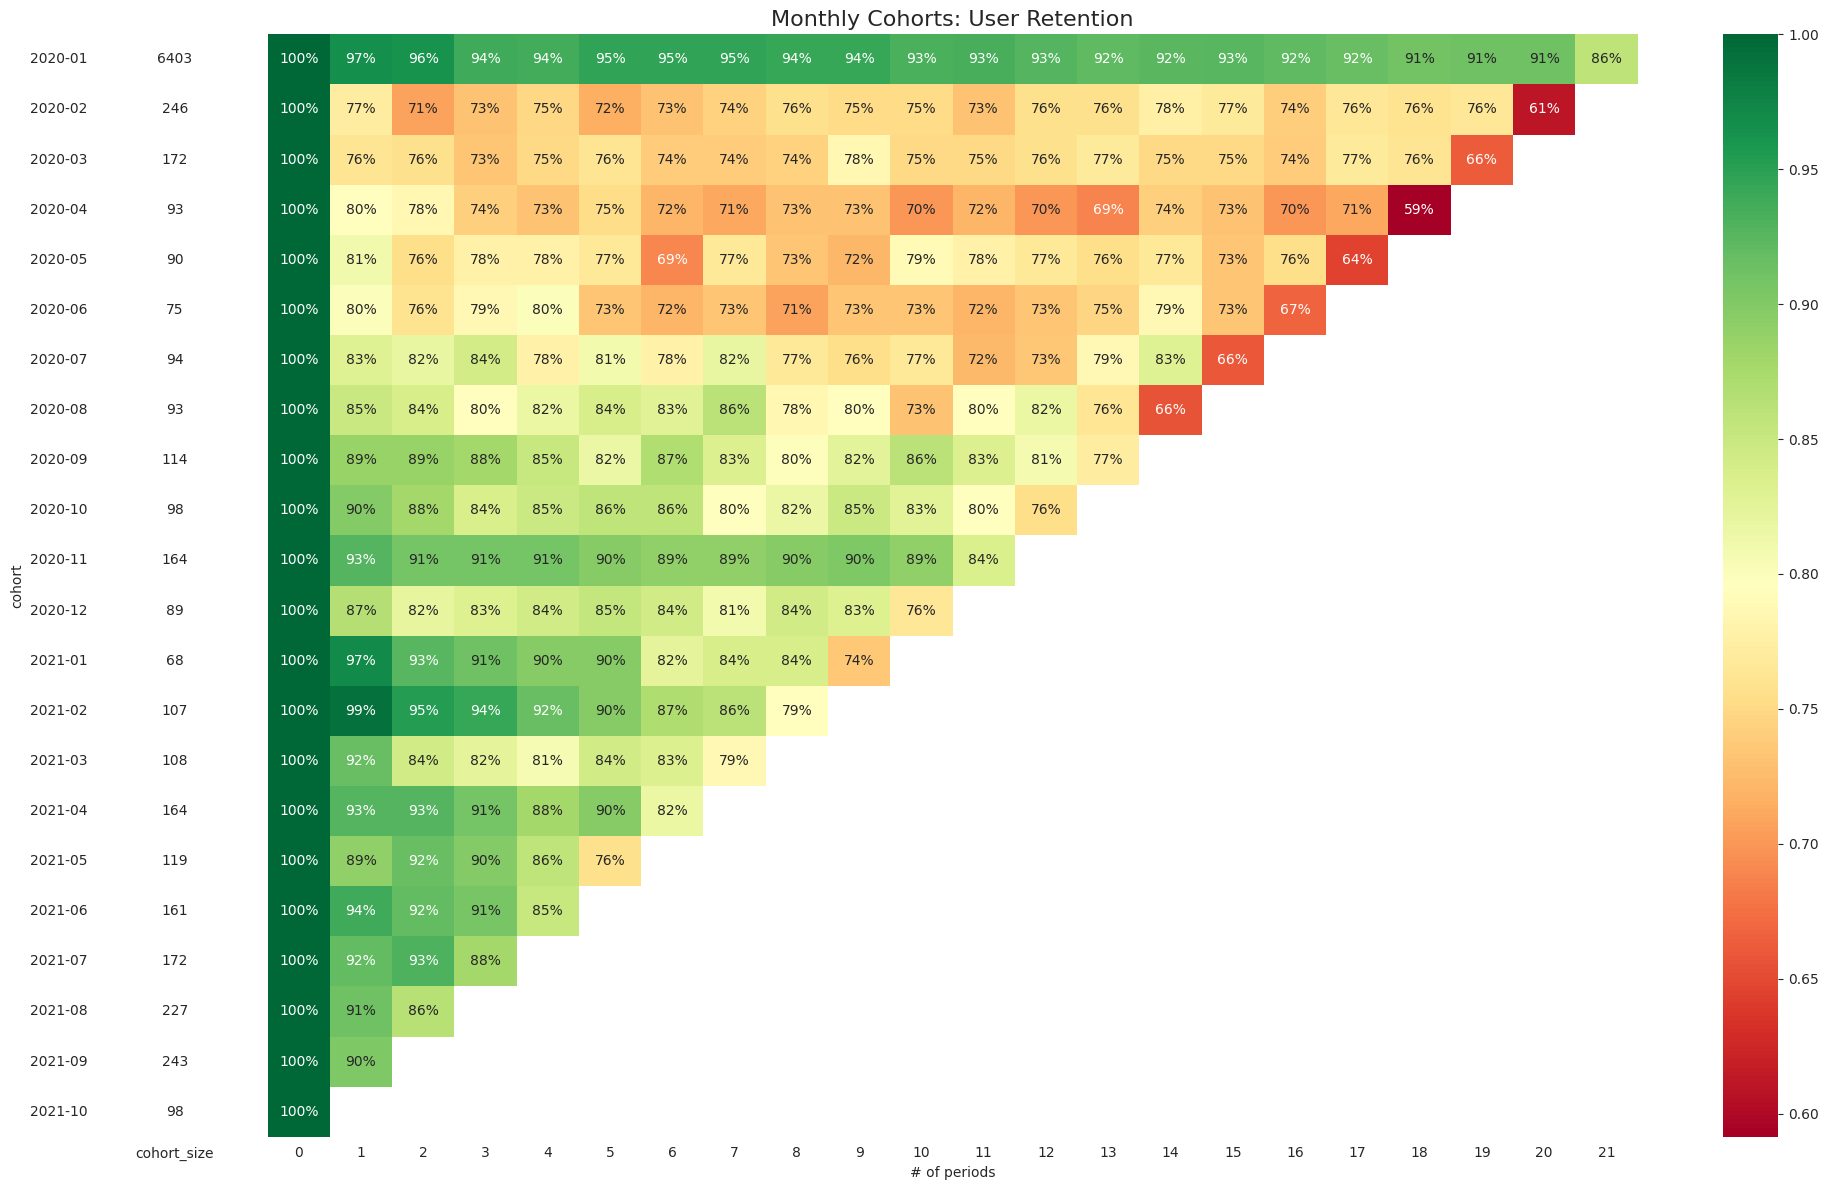

In [14]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

# RFM Segmentation

In [15]:
PRESENT = dt.datetime(year=2021, month=10, day=12)
rfm= df2.groupby('uid1').agg({'date_pur': lambda date: (PRESENT - date.max()).days,
                                        'transaction_qty': lambda num: num.sum(),
                                        'transaction_amt': lambda price: price.sum()})


In [16]:
rfm.columns

Index(['date_pur', 'transaction_qty', 'transaction_amt'], dtype='object')

In [17]:
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
uid1,,,
8388,1,201,127141.34
17264,4,691,153450.45
17373,14,488,911493.93
26297,0,483,174610.41
27044,0,901,925225.73


In [18]:
quartiles = rfm.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))


      recency  frequency     monetary
0.25      0.0      161.0   77921.9350
0.50      1.0      465.0  233453.8850
0.75      4.0      910.0  492954.2975 <class 'pandas.core.frame.DataFrame'>


In [19]:
quartiles=quartiles.to_dict()
quartiles


{'recency': {0.25: 0.0, 0.5: 1.0, 0.75: 4.0},
 'frequency': {0.25: 161.0, 0.5: 465.0, 0.75: 910.0},
 'monetary': {0.25: 77921.935, 0.5: 233453.885, 0.75: 492954.2975}}

In [20]:
## for Recency

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

## for Frequency and Monetary value

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
       return 3
    else:
        return 4

rfmSeg = rfm
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary'].apply(FMClass, args=('monetary',quartiles,))
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)
rfmSeg.head()


,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
8388,1,201,127141.34,3,2,2,322
17264,4,691,153450.45,2,3,2,232
17373,14,488,911493.93,1,3,4,134
26297,0,483,174610.41,4,3,2,432
27044,0,901,925225.73,4,3,4,434


In [21]:
rfmSeg.sort_values(by=['RFMClass', 'monetary'], ascending=[True, False])

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
uid1,,,,,,,
37655841,9,71,77817.53,1,1,1,111
17702621,35,81,77769.36,1,1,1,111
5350923,6,160,77576.99,1,1,1,111
2927596,37,87,77469.07,1,1,1,111
36413135,85,95,77236.18,1,1,1,111
...,...,...,...,...,...,...,...
28056659,0,1338,494864.53,4,4,4,444
45511654,0,1618,494096.36,4,4,4,444
19572371,0,945,493350.56,4,4,4,444


In [22]:
rfmSeg.groupby('RFMClass').agg('monetary').mean()

RFMClass
111    1.545301e+04
112    1.232399e+05
113    3.364322e+05
114    7.194062e+05
121    5.754931e+04
122    1.422656e+05
123    3.235025e+05
124    8.646327e+05
131    6.800143e+04
132    1.632139e+05
133    3.370150e+05
134    7.743304e+05
142    1.764136e+05
143    3.494187e+05
144    8.854786e+05
211    2.680028e+04
212    1.209728e+05
213    2.609665e+05
214    6.055956e+05
221    5.768185e+04
222    1.505003e+05
223    3.270084e+05
224    6.942007e+05
231    7.216625e+04
232    1.718429e+05
233    3.418591e+05
234    7.463387e+05
242    1.727579e+05
243    3.601931e+05
244    9.395535e+05
311    2.596104e+04
312    1.219960e+05
313    3.024270e+05
321    5.648527e+04
322    1.468030e+05
323    3.293815e+05
324    9.203989e+05
331    6.244639e+04
332    1.757303e+05
333    3.460581e+05
334    8.330994e+05
342    1.844492e+05
343    3.789834e+05
344    1.108803e+06
411    2.667958e+04
412    1.241490e+05
413    3.013241e+05
414    1.099971e+06
421    5.248162e+04
422    1.44

In [23]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 8388 to 52812230
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   recency      9198 non-null   int64  
 1   frequency    9198 non-null   int64  
 2   monetary     9198 non-null   float64
 3   R_Quartile   9198 non-null   int64  
 4   F_Quartile   9198 non-null   int64  
 5   M_Quartile   9198 non-null   int64  
 6   RFMClass     9198 non-null   object 
 7   Total Score  9198 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 646.7+ KB
       recency  frequency   monetary  R_Quartile  F_Quartile  M_Quartile  \
uid1                                                                       
8388         1        201  127141.34           3           2           2   
17264        4        691  153450.45           2           3           2   
17373       14        488  911493.93           1           3           4   
26297        0        4

In [24]:
rfmSeg.groupby('Total Score').agg('monetary').mean()

Total Score
3     1.545301e+04
4     6.456457e+04
5     1.110973e+05
6     1.102769e+05
7     2.199718e+05
8     2.680698e+05
9     3.633129e+05
10    4.635503e+05
11    6.820331e+05
12    1.189870e+06
Name: monetary, dtype: float64

<Axes: xlabel='Total Score'>

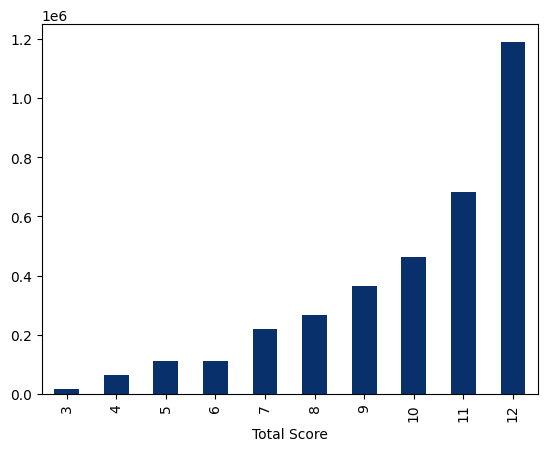

In [25]:
rfmSeg.groupby('Total Score').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')

# Cluster analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-790cfd1cdbe4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_recency["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-790cfd1cdbe4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

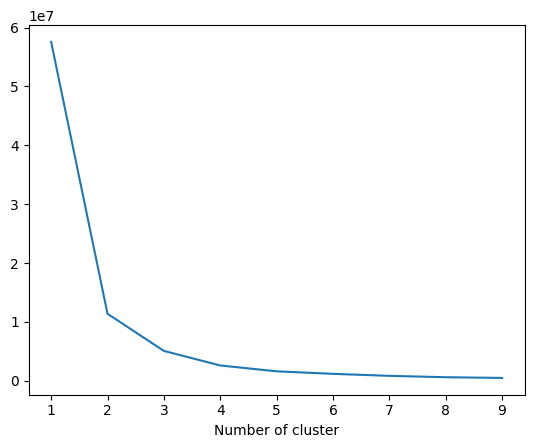

In [30]:
#Finding Optimum Clusters
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
!pip install squarify
#import squarify
from sklearn.cluster import KMeans
sse={}
tx_recency = rfm[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

 k=3 can be considered a good number of the cluster to cluster this data.



In [31]:
#### Function for ordering clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

#Recency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm[['recency']])
rfm['RecencyCluster']=kmeans.predict(rfm[['recency']])
rfm = order_cluster('RecencyCluster','recency', rfm, False)

#Frequency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm[['frequency']])
rfm['FrequencyCluster']=kmeans.predict(rfm[['frequency']])
rfm = order_cluster('FrequencyCluster','frequency', rfm, True)

#Monetary Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm[['monetary']])
rfm['MonetaryCluster']=kmeans.predict(rfm[['monetary']])
rfm = order_cluster('MonetaryCluster','monetary', rfm, True)

# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

# Creating Recency Custer Tag Column
c=rfm.groupby('RecencyCluster')['recency'].agg(['min','max','mean']).reset_index()
r1='<='+str(c.iloc[2,2])
r2=str(c.iloc[1,1])+' to '+str(c.iloc[1,2])
r3='>='+str(c.iloc[0,1])
# Create the dictionary
R ={0 : r3, 1 : r2, 2 : r1}
rfm['RecencyClusterTag']=rfm['RecencyCluster'].apply(set_value, args =(R, ))

# Creating Frequency Custer Tag Column
a=rfm.groupby('FrequencyCluster')['frequency'].agg(['min','max','mean']).reset_index()
f1='<='+str(a.iloc[0,2])
f2=str(a.iloc[1,1])+' to '+str(a.iloc[1,2])
f3='>='+str(a.iloc[2,1])
# Create the dictionary
F ={0 : f1, 1 : f2, 2 :f3}
rfm['FrequencyClusterTag']=rfm['FrequencyCluster'].apply(set_value, args =(F, ))

# Creating Monetary Custer Tag Column
b=rfm.groupby('MonetaryCluster')['monetary'].agg(['min','max','mean']).reset_index()
m1='<='+str(int(round(b.iloc[0,2])))
m2=str(int(round(b.iloc[0,2])+1))+' to '+str(int(round(b.iloc[1,2])))
m3='>='+str(int(round(b.iloc[1,2])+1))
# Create the dictionary
M ={0 : m1, 1 : m2, 2 :m3}
rfm['MonetaryClusterTag']=rfm['MonetaryCluster'].apply(set_value, args =(M, ))

rfm["FrequencyClusterTag"] = rfm["FrequencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[f1, f2, f3]))
rfm["MonetaryClusterTag"] = rfm["MonetaryClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[m1, m2,m3]))
rfm["RecencyClusterTag"] = rfm["RecencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[r1, r2,r3]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
rfm

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag
0,1,201,127141.34,3,2,2,322,7,2,0,0,<=92,<=554,<=879347
1,0,483,174610.41,4,3,2,432,9,2,0,0,<=92,<=554,<=879347
2,3,16,5317.23,2,1,1,211,4,2,0,0,<=92,<=554,<=879347
3,71,141,18192.17,1,1,1,111,3,2,0,0,<=92,<=554,<=879347
4,12,243,141991.62,1,2,2,122,5,2,0,0,<=92,<=554,<=879347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,0,4139,11416721.83,4,4,4,444,12,2,2,2,<=92,>=1384,>=6913301
9194,0,3381,8373400.18,4,4,4,444,12,2,2,2,<=92,>=1384,>=6913301
9195,0,1765,10495130.26,4,4,4,444,12,2,2,2,<=92,>=1384,>=6913301
9196,1,1489,8582394.08,3,4,4,344,11,2,2,2,<=92,>=1384,>=6913301


In [33]:
#calculate overall score and use mean() to see details
rfm['OverallScore'] = rfm['RecencyCluster'] + rfm['FrequencyCluster'] + rfm['MonetaryCluster']
rfm.groupby('OverallScore')['recency','frequency','monetary'].mean()

<ipython-input-33-c033278b9994>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfm.groupby('OverallScore')['recency','frequency','monetary'].mean()


,recency,frequency,monetary
OverallScore,,,
0,460.597156,52.445498,2.693155e+04
1,184.635802,132.379630,6.981983e+04
2,9.146065,233.787661,1.488652e+05
3,2.067563,870.338540,4.361515e+05
4,0.971687,1401.056625,9.560675e+05
5,0.606061,1995.876457,1.641643e+06
6,0.090909,2569.454545,1.291601e+07


In [34]:
rfm['Segment'] = 'Low-Value'
rfm.loc[rfm['OverallScore']>2,'Segment'] = 'Mid-Value'
rfm.loc[rfm['OverallScore']>4,'Segment'] = 'High-Value'

In [35]:
!pip install chart-studio
from chart_studio import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
#Monetary vs Frequency
tx_graph = rfm.query("monetary < 8000000 and frequency < 1500")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['monetary'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['monetary'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['monetary'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#Monetary vs  Recency

tx_graph = rfm.query("monetary < 8000000 and frequency < 1500")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['monetary'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['monetary'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['recency'],
        y=tx_graph.query("Segment == 'High-Value'")['monetary'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "monetary"},
        xaxis= {'title': "recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Recency vs Frequency
tx_graph = rfm.query("monetary < 8000000 and frequency < 1500")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['recency'],
        y=tx_graph.query("Segment == 'High-Value'")['frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.3 MB/s eta 0:00:00


In [36]:
rfm

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,OverallScore,Segment
0,1,201,127141.34,3,2,2,322,7,2,0,0,<=92,<=554,<=879347,2,Low-Value
1,0,483,174610.41,4,3,2,432,9,2,0,0,<=92,<=554,<=879347,2,Low-Value
2,3,16,5317.23,2,1,1,211,4,2,0,0,<=92,<=554,<=879347,2,Low-Value
3,71,141,18192.17,1,1,1,111,3,2,0,0,<=92,<=554,<=879347,2,Low-Value
4,12,243,141991.62,1,2,2,122,5,2,0,0,<=92,<=554,<=879347,2,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,0,4139,11416721.83,4,4,4,444,12,2,2,2,<=92,>=1384,>=6913301,6,High-Value
9194,0,3381,8373400.18,4,4,4,444,12,2,2,2,<=92,>=1384,>=6913301,6,High-Value
9195,0,1765,10495130.26,4,4,4,444,12,2,2,2,<=92,>=1384,>=6913301,6,High-Value
9196,1,1489,8582394.08,3,4,4,344,11,2,2,2,<=92,>=1384,>=6913301,6,High-Value


In [38]:
rfmSeg=rfmSeg.drop(labels='RecencyCluster',axis=1)
rfmSeg=rfmSeg.reset_index(drop=False)
rfmSeg

,uid1,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
0,8388,1,201,127141.34,3,2,2,322,7
1,17264,4,691,153450.45,2,3,2,232,7
2,17373,14,488,911493.93,1,3,4,134,8
3,26297,0,483,174610.41,4,3,2,432,9
4,27044,0,901,925225.73,4,3,4,434,11
...,...,...,...,...,...,...,...,...,...
9193,52794735,0,2020,2661702.15,4,4,4,444,12
9194,52801709,3,271,326395.75,2,2,3,223,7
9195,52808813,0,547,604393.68,4,3,4,434,11
9196,52810355,61,1267,252116.56,1,4,3,143,8


In [39]:

rfmSeg

,uid1,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
0,8388,1,201,127141.34,3,2,2,322,7
1,17264,4,691,153450.45,2,3,2,232,7
2,17373,14,488,911493.93,1,3,4,134,8
3,26297,0,483,174610.41,4,3,2,432,9
4,27044,0,901,925225.73,4,3,4,434,11
...,...,...,...,...,...,...,...,...,...
9193,52794735,0,2020,2661702.15,4,4,4,444,12
9194,52801709,3,271,326395.75,2,2,3,223,7
9195,52808813,0,547,604393.68,4,3,4,434,11
9196,52810355,61,1267,252116.56,1,4,3,143,8


In [40]:
rfm_merge = pd.merge(rfmSeg,rfm,on=['recency','frequency','monetary','R_Quartile','F_Quartile','M_Quartile','RFMClass','Total Score'])
rfm_merge

,uid1,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,OverallScore,Segment
0,8388,1,201,127141.34,3,2,2,322,7,2,0,0,<=92,<=554,<=879347,2,Low-Value
1,17264,4,691,153450.45,2,3,2,232,7,2,1,0,<=92,555 to 1381,<=879347,3,Mid-Value
2,17373,14,488,911493.93,1,3,4,134,8,2,0,1,<=92,<=554,879348 to 6913300,3,Mid-Value
3,26297,0,483,174610.41,4,3,2,432,9,2,0,0,<=92,<=554,<=879347,2,Low-Value
4,27044,0,901,925225.73,4,3,4,434,11,2,1,1,<=92,555 to 1381,879348 to 6913300,4,Mid-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,52794735,0,2020,2661702.15,4,4,4,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
9194,52801709,3,271,326395.75,2,2,3,223,7,2,0,0,<=92,<=554,<=879347,2,Low-Value
9195,52808813,0,547,604393.68,4,3,4,434,11,2,0,0,<=92,<=554,<=879347,2,Low-Value
9196,52810355,61,1267,252116.56,1,4,3,143,8,2,1,0,<=92,555 to 1381,<=879347,3,Mid-Value


In [41]:
df =pd.merge(df1,rfm_merge,on='uid1')
df

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,...,RFMClass,Total Score,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,OverallScore,Segment
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0,...,322,7,2,0,0,<=92,<=554,<=879347,2,Low-Value
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0,...,232,7,2,1,0,<=92,555 to 1381,<=879347,3,Mid-Value
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0,...,134,8,2,0,1,<=92,<=554,879348 to 6913300,3,Mid-Value
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0,...,432,9,2,0,0,<=92,<=554,<=879347,2,Low-Value
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0,...,434,11,2,1,1,<=92,555 to 1381,879348 to 6913300,4,Mid-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,52794735.0,42.0,RUSSIA,Omsk,04.06.2013,22.01.2021,1.0,1.0,1.0,1.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
9194,52801709.0,57.0,RUSSIA,Omsk,17.08.2013,18.02.2016,0.0,0.0,1.0,0.0,...,223,7,2,0,0,<=92,<=554,<=879347,2,Low-Value
9195,52808813.0,40.0,RUSSIA,Sevastopol,14.12.2020,23.12.2020,0.0,0.0,1.0,0.0,...,434,11,2,0,0,<=92,<=554,<=879347,2,Low-Value
9196,52810355.0,41.0,RUSSIA,Sevastopol,24.11.2019,10.02.2021,0.0,1.0,1.0,1.0,...,143,8,2,1,0,<=92,555 to 1381,<=879347,3,Mid-Value


In [42]:
df.isnull().sum()

uid1                         0
customer_age                 5
country                      0
city_of_living               0
registration_dt             78
website_last_visit_date    204
email                        0
has_mob_app                  0
phone_number                 0
push                         0
recency                      0
frequency                    0
monetary                     0
R_Quartile                   0
F_Quartile                   0
M_Quartile                   0
RFMClass                     0
Total Score                  0
RecencyCluster               0
FrequencyCluster             0
MonetaryCluster              0
RecencyClusterTag            0
FrequencyClusterTag          0
MonetaryClusterTag           0
OverallScore                 0
Segment                      0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 0 to 9197
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   uid1                     9198 non-null   float64 
 1   customer_age             9193 non-null   float64 
 2   country                  9198 non-null   object  
 3   city_of_living           9198 non-null   object  
 4   registration_dt          9120 non-null   object  
 5   website_last_visit_date  8994 non-null   object  
 6   email                    9198 non-null   float64 
 7   has_mob_app              9198 non-null   float64 
 8   phone_number             9198 non-null   float64 
 9   push                     9198 non-null   float64 
 10  recency                  9198 non-null   int64   
 11  frequency                9198 non-null   int64   
 12  monetary                 9198 non-null   float64 
 13  R_Quartile               9198 non-null   int64   
 14  F_Quarti

Before running any hypothesis test, it's important to know which statistical method we should use. Statstical methods are divided in two parts :



*   **Parametric statistical methods**
*   **Nonparametric statistical methods**



To know which one to use, normality tests must be done on our data. If our data have a known and specific distribution, such as the Gaussian distribution; parametric statistical methods must be used. On the contrary, if data are not Gaussian, nonparametric statistical methods should be used.

There are two main ways to know if our data are Gaussian :



*   **Graphical methods**

**   Histogram plot

**   QQ plot
*   **Statistical methods**

**  Shapiro test

**  D'Agostino and Pearson test

**  Anderson-Darling test

**  Kolmogorov-Smirnov test

#Statistical Method
There are several tests to verify if a variable is Gaussian or not. Each of them will return two metrics :

Statstic value : metric used to calculate the p-value

p-value : metric used to interpret the test

For each of the tests, the conclusion mecanic is the same :

if p-value  ≤α
  : We reject the null hypothesis and conclude of a non Gaussian distribution

if p-value  >α
  : We fail to reject the null hypothesis and conclude of a Gaussian distribution

With  α being the significance level

In [46]:
df_highvalue=df[df['Segment']=='High-Value']
df_midvalue=df[df['Segment']=='Mid-Value']
df_lowvalue=df[df['Segment']=='Low-Value']

In [51]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import normaltest

a=df_highvalue[['email']]
b=df_highvalue[['has_mob_app']]
c=df_highvalue[['phone_number']]
d=df_highvalue[['push']]

stat, p = normaltest(a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('email: Sample looks Gaussian (fail to reject H0)')
else:
    print('email: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(b)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('mob_app: Sample looks Gaussian (fail to reject H0)')
else:
    print('mob_app: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(c)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('phone_number: Sample looks Gaussian (fail to reject H0)')
else:
    print('phone_number: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(d)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('push: Sample looks Gaussian (fail to reject H0)')
else:
    print('push: Sample does not look Gaussian (reject H0)')

Statistics=2063.886, p=0.000
email: Sample does not look Gaussian (reject H0)
Statistics=1895.799, p=0.000
mob_app: Sample does not look Gaussian (reject H0)
Statistics=1065.166, p=0.000
phone_number: Sample does not look Gaussian (reject H0)
Statistics=4192.269, p=0.000
push: Sample does not look Gaussian (reject H0)


In [52]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import normaltest

a=df_midvalue[['email']]
b=df_midvalue[['has_mob_app']]
c=df_midvalue[['phone_number']]
d=df_midvalue[['push']]

stat, p = normaltest(a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('email: Sample looks Gaussian (fail to reject H0)')
else:
    print('email: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(b)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('mob_app: Sample looks Gaussian (fail to reject H0)')
else:
    print('mob_app: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(c)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('phone_number: Sample looks Gaussian (fail to reject H0)')
else:
    print('phone_number: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(d)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('push: Sample looks Gaussian (fail to reject H0)')
else:
    print('push: Sample does not look Gaussian (reject H0)')

Statistics=664.709, p=0.000
email: Sample does not look Gaussian (reject H0)
Statistics=22143.461, p=0.000
mob_app: Sample does not look Gaussian (reject H0)
Statistics=7779.161, p=0.000
phone_number: Sample does not look Gaussian (reject H0)
Statistics=663.871, p=0.000
push: Sample does not look Gaussian (reject H0)


In [53]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import normaltest

a=df_lowvalue[['email']]
b=df_lowvalue[['has_mob_app']]
c=df_lowvalue[['phone_number']]
d=df_lowvalue[['push']]

stat, p = normaltest(a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('email: Sample looks Gaussian (fail to reject H0)')
else:
    print('email: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(b)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('mob_app: Sample looks Gaussian (fail to reject H0)')
else:
    print('mob_app: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(c)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('phone_number: Sample looks Gaussian (fail to reject H0)')
else:
    print('phone_number: Sample does not look Gaussian (reject H0)')

stat, p = normaltest(d)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('push: Sample looks Gaussian (fail to reject H0)')
else:
    print('push: Sample does not look Gaussian (reject H0)')

Statistics=1704.697, p=0.000
email: Sample does not look Gaussian (reject H0)
Statistics=1125.923, p=0.000
mob_app: Sample does not look Gaussian (reject H0)
Statistics=10937.537, p=0.000
phone_number: Sample does not look Gaussian (reject H0)
Statistics=2207.309, p=0.000
push: Sample does not look Gaussian (reject H0)


All the p-values are inferior to 0.05 :
We reject the null-hypothesis. Our variables are not Gaussian at a 5% significance level

use nonparametric statistical methods to test our hypotheses

#**Mann-Whitney's test**

In [45]:
from scipy import stats
from numpy import median
from numpy import std

In [57]:
df_highvalue

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,...,RFMClass,Total Score,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,OverallScore,Segment
42,191216.0,37.0,RUSSIA,Sevastopol,12.08.2019,03.04.2020,0.0,0.0,1.0,0.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
79,428242.0,32.0,RUSSIA,Saint-Petersburg,17.04.2017,NaN,0.0,1.0,1.0,1.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
103,608812.0,33.0,RUSSIA,Saint-Petersburg,21.02.2014,24.04.2015,1.0,1.0,1.0,0.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
106,617749.0,30.0,RUSSIA,Kazan,14.05.2014,24.08.2015,1.0,0.0,1.0,0.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
114,694244.0,35.0,RUSSIA,Moscow,20.08.2013,08.08.2014,1.0,0.0,1.0,0.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9133,52451484.0,37.0,RUSSIA,Vladivostok,01.11.2017,16.11.2018,0.0,0.0,1.0,0.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
9137,52469895.0,42.0,RUSSIA,Voronezh,16.07.2019,12.07.2020,0.0,1.0,1.0,1.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
9149,52520365.0,26.0,RUSSIA,Odintsovo,15.04.2016,17.04.2020,1.0,1.0,1.0,1.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value
9177,52698630.0,31.0,RUSSIA,Ekaterinburg,09.06.2016,08.06.2020,1.0,1.0,1.0,1.0,...,444,12,2,2,1,<=92,>=1384,879348 to 6913300,5,High-Value


# **email**

In [48]:
email1=df_highvalue[['email','monetary']]
has_email1=email1[email1['email'] == 1.0]
no_email1=email1[email1['email']==0.0]

email2=df_midvalue[['email','monetary']]
has_email2=email2[email2['email'] == 1.0]
no_email2=email2[email2['email']==0.0]

email3=df_lowvalue[['email','monetary']]
has_email3=email3[email3['email'] == 1.0]
no_email3=email3[email3['email']==0.0]


In [ ]:

#cor, pval = stats.spearmanr(email[['email']], email[['monetary']])
#print("The orrelation coefficient of Non-Parametric Spearman correlation test : %.4f, \np-value: %.4f" % (cor, pval))

The orrelation coefficient of Non-Parametric Spearman correlation test : 0.2033, 
p-value: 0.0000


In [49]:
stat, p = mannwhitneyu(has_email1.monetary, no_email1.monetary)
alpha =0.05
print('has_email1 median = %.0f stdv = %.1f' % (median(has_email1.monetary), std(has_email1.monetary)))
print('no_email1 median = %.0f stdv = %.1f' % (median(no_email1.monetary), std(no_email1.monetary)))
print(stats.mannwhitneyu(has_email1.monetary, no_email1.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no email in high-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no email in high-value segments are statistically different')


stat, p = mannwhitneyu(has_email2.monetary, no_email2.monetary)
alpha =0.05
print('has_email2 median = %.0f stdv = %.1f' % (median(has_email2.monetary), std(has_email2.monetary)))
print('no_email2 median = %.0f stdv = %.1f' % (median(no_email2.monetary), std(no_email2.monetary)))
print(stats.mannwhitneyu(has_email2.monetary, no_email2.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no email in mid-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no email in mid-value segments are statistically different')


stat, p = mannwhitneyu(has_email3.monetary, no_email3.monetary)
alpha =0.05
print('has_email3 median = %.0f stdv = %.1f' % (median(has_email3.monetary), std(has_email3.monetary)))
print('no_email3 median = %.0f stdv = %.1f' % (median(no_email3.monetary), std(no_email3.monetary)))
print(stats.mannwhitneyu(has_email3.monetary, no_email3.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no email in low-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no email in low-value segments are statistically different')

has_email1 median = 1375460 stdv = 2107536.1
no_email1 median = 1282466 stdv = 2281546.1
MannwhitneyuResult(statistic=25809.0, pvalue=0.07109418606533839)
We fail to reject H0 since the monetary of has or no email in high-value segments are not statistically different
has_email2 median = 591439 stdv = 523024.4
no_email2 median = 430897 stdv = 395013.7
MannwhitneyuResult(statistic=1472308.0, pvalue=9.351307333590045e-37)
We reject H0 since the monetary of has or no email in mid-value segments are statistically different
has_email3 median = 138553 stdv = 293761.3
no_email3 median = 87949 stdv = 145487.3
MannwhitneyuResult(statistic=2000121.5, pvalue=2.3683924433088595e-18)
We reject H0 since the monetary of has or no email in low-value segments are statistically different


#**mob_app**

In [50]:
app1=df_highvalue[['has_mob_app','monetary']]
has_app1=app1[app1['has_mob_app'] == 1.0]
no_app1=app1[app1['has_mob_app'] == 0.0]

app2=df_midvalue[['has_mob_app','monetary']]
has_app2=app2[app2['has_mob_app'] == 1.0]
no_app2=app2[app2['has_mob_app']==0.0]

app3=df_lowvalue[['has_mob_app','monetary']]
has_app3=app3[app3['has_mob_app'] == 1.0]
no_app3=app3[app3['has_mob_app']==0.0]


In [54]:
stat, p = mannwhitneyu(has_app1.monetary, no_app1.monetary)
alpha =0.05
print('has_app1 median = %.0f stdv = %.1f' % (median(has_app1.monetary), std(has_app1.monetary)))
print('no_app1 median = %.0f stdv = %.1f' % (median(no_app1.monetary), std(no_app1.monetary)))
print(stats.mannwhitneyu(has_app1.monetary, no_app1.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no app in high-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no app in high-value segments are statistically different')

stat, p = mannwhitneyu(has_app2.monetary, no_app2.monetary)
alpha =0.05
print('has_app2 median = %.0f stdv = %.1f' % (median(has_app2.monetary), std(has_app2.monetary)))
print('no_app2 median = %.0f stdv = %.1f' % (median(no_app2.monetary), std(no_app2.monetary)))
print(stats.mannwhitneyu(has_app2.monetary, no_app2.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no app in mid-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no app in mid-value segments are statistically different')


stat, p = mannwhitneyu(has_app3.monetary, no_app3.monetary)
alpha =0.05
print('has_app3 median = %.0f stdv = %.1f' % (median(has_app3.monetary), std(has_app3.monetary)))
print('no_app3 median = %.0f stdv = %.1f' % (median(no_app3.monetary), std(no_app3.monetary)))
print(stats.mannwhitneyu(has_app3.monetary, no_app3.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no app in low-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no app in low-value segments are statistically different')



has_app1 median = 1378421 stdv = 2215313.1
no_app1 median = 1308350 stdv = 2205200.0
MannwhitneyuResult(statistic=27558.0, pvalue=0.008783019725611924)
We reject H0 since the monetary of has or no app in high-value segments are statistically different
has_app2 median = 497173 stdv = 406231.1
no_app2 median = 449357 stdv = 446120.4
MannwhitneyuResult(statistic=1597659.0, pvalue=3.715737393597472e-05)
We reject H0 since the monetary of has or no app in mid-value segments are statistically different
has_app3 median = 121963 stdv = 157552.9
no_app3 median = 87162 stdv = 180437.1
MannwhitneyuResult(statistic=2425351.0, pvalue=3.771465538697792e-18)
We reject H0 since the monetary of has or no app in low-value segments are statistically different


#**phone_number**

In [56]:
pn1=df_highvalue[['phone_number','monetary']]
has_pn1=pn1[pn1['phone_number'] == 1.0]
no_pn1=pn1[pn1['phone_number'] == 0.0]

pn2=df_midvalue[['phone_number','monetary']]
has_pn2=pn2[pn2['phone_number'] == 1.0]
no_pn2=pn2[pn2['phone_number']==0.0]

pn3=df_lowvalue[['phone_number','monetary']]
has_pn3=pn3[pn3['phone_number'] == 1.0]
no_pn3=pn3[pn3['phone_number']==0.0]


In [59]:
has_pn1,no_pn1

(      phone_number    monetary
 42             1.0  1349335.86
 79             1.0  1803727.95
 103            1.0  1367497.36
 106            1.0  1132268.31
 114            1.0  1306738.96
 ...            ...         ...
 9133           1.0  1237157.51
 9137           1.0  2073126.24
 9149           1.0  1346709.81
 9177           1.0  1768586.93
 9193           1.0  2661702.15
 
 [439 rows x 2 columns],
       phone_number    monetary
 1287           0.0  1125362.19)

In [60]:

stat, p = mannwhitneyu(has_pn1.monetary, no_pn1.monetary)
alpha =0.05
print('has_pn1 median = %.0f stdv = %.1f' % (median(has_pn1.monetary), std(has_pn1.monetary)))
print('no_pn1 median = %.0f stdv = %.1f' % (median(no_pn1.monetary), std(no_pn1.monetary)))
print(stats.mannwhitneyu(has_pn1.monetary, no_pn1.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no pn in high-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no pn in high-value segments are statistically different')

stat, p = mannwhitneyu(has_pn2.monetary, no_pn2.monetary)
alpha =0.05
print('has_pn2 median = %.0f stdv = %.1f' % (median(has_pn2.monetary), std(has_pn2.monetary)))
print('no_pn2 median = %.0f stdv = %.1f' % (median(no_pn2.monetary), std(no_pn2.monetary)))
print(stats.mannwhitneyu(has_pn2.monetary, no_pn2.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no pn in mid-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no pn in mid-value segments are statistically different')


stat, p = mannwhitneyu(has_pn3.monetary, no_pn3.monetary)
alpha =0.05
print('has_pn3 median = %.0f stdv = %.1f' % (median(has_pn3.monetary), std(has_pn3.monetary)))
print('no_pn3 median = %.0f stdv = %.1f' % (median(no_pn3.monetary), std(no_pn3.monetary)))
print(stats.mannwhitneyu(has_pn3.monetary, no_pn3.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no pn in low-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no pn in low-value segments are statistically different')




has_pn1 median = 1346710 stdv = 2215065.6
no_pn1 median = 1125362 stdv = 0.0
MannwhitneyuResult(statistic=299.0, pvalue=0.6409090909090888)
We fail to reject H0 since the monetary of has or no pn in high-value segments are not statistically different
has_pn2 median = 465445 stdv = 433719.0
no_pn2 median = 621567 stdv = 271777.4
MannwhitneyuResult(statistic=11660.0, pvalue=0.05099373314822405)
We fail to reject H0 since the monetary of has or no pn in mid-value segments are not statistically different
has_pn3 median = 93793 stdv = 176816.3
no_pn3 median = 59059 stdv = 183716.3
MannwhitneyuResult(statistic=36436.0, pvalue=0.9021242906186404)
We fail to reject H0 since the monetary of has or no pn in low-value segments are not statistically different


#push

In [61]:
push1=df_highvalue[['push','monetary']]
has_push1=push1[push1['push'] == 1.0]
no_push1=push1[push1['push']==0.0]

push2=df_midvalue[['push','monetary']]
has_push2=push2[push2['push'] == 1.0]
no_push2=push2[push2['push']==0.0]

push3=df_lowvalue[['push','monetary']]
has_push3=push3[push3['push'] == 1.0]
no_push3=push3[push3['push']==0.0]


In [62]:
stat, p = mannwhitneyu(has_push1.monetary, no_push1.monetary)
alpha =0.05
print('has_push1 median = %.0f stdv = %.1f' % (median(has_push1.monetary), std(has_push1.monetary)))
print('no_push1 median = %.0f stdv = %.1f' % (median(no_push1.monetary), std(no_push1.monetary)))
print(stats.mannwhitneyu(has_push1.monetary, no_push1.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no push in high-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no push in high-value segments are statistically different')

stat, p = mannwhitneyu(has_push2.monetary, no_push2.monetary)
alpha =0.05
print('has_push2 median = %.0f stdv = %.1f' % (median(has_push2.monetary), std(has_push2.monetary)))
print('no_push2 median = %.0f stdv = %.1f' % (median(no_push2.monetary), std(no_push2.monetary)))
print(stats.mannwhitneyu(has_push2.monetary, no_push2.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no push in mid-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no push in mid-value segments are statistically different')


stat, p = mannwhitneyu(has_push3.monetary, no_push3.monetary)
alpha =0.05
print('has_push3 median = %.0f stdv = %.1f' % (median(has_push3.monetary), std(has_push3.monetary)))
print('no_push3 median = %.0f stdv = %.1f' % (median(no_push3.monetary), std(no_push3.monetary)))
print(stats.mannwhitneyu(has_push3.monetary, no_push3.monetary))

if p > alpha:
    print('We fail to reject H0 since the monetary of has or no push in low-value segments are not statistically different')
else:
    print('We reject H0 since the monetary of has or no push in low-value segments are statistically different')




has_push1 median = 1405967 stdv = 2459062.3
no_push1 median = 1319468 stdv = 2085218.5
MannwhitneyuResult(statistic=22791.0, pvalue=0.14953122977623665)
We fail to reject H0 since the monetary of has or no push in high-value segments are not statistically different
has_push2 median = 482986 stdv = 387662.8
no_push2 median = 460123 stdv = 445579.3
MannwhitneyuResult(statistic=1179899.0, pvalue=0.13392153568322135)
We fail to reject H0 since the monetary of has or no push in mid-value segments are not statistically different
has_push3 median = 120264 stdv = 161602.1
no_push3 median = 89314 stdv = 178358.5
MannwhitneyuResult(statistic=1624200.5, pvalue=1.5452735434926158e-11)
We reject H0 since the monetary of has or no push in low-value segments are statistically different


# Target high-value customer segments:
 - Send personalised emails to inform customers about special offers or promotions based on their preferences and past purchases.
 - Use in-app notifications to inform them of exclusive offers and loyalty rewards

# Target mid-value customer segments:
 - Encourage them to refer friends and family by offering referral bonuses or discounts.
 - Launch media campaigns and adverts to reach a wider audience and engage customers.

# Target low value customer segments:
 - Send personalised emails to re-engage customers with incentives to encourage them to buy again.
 - Implement a customer feedback programme to understand pain points and address any issues.
 - Place retargeting adverts on various websites to remind them of products of interest.